<a href="https://colab.research.google.com/github/iskra3138/GluonTS/blob/master/1_1_GluonTS_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GluonTS - Probabilistic Time Series Modeling

Ref.: https://gluon-ts.mxnet.io/index.html#

Gluon Time Series (GluonTS) is the Gluon toolkit for probabilistic time series modeling, focusing on deep learning-based models.

GluonTS provides utilities for loading and iterating over time series datasets, state of the art models ready to be trained, and building blocks to define your own models and quickly experiment with different solutions. With GluonTS you can:

- Train and evaluate any of the built-in models on your own data, and quickly come up with a solution for your time series tasks.
- Use the provided abstractions and building blocks to create custom time series models, and rapidly benchmark them against baseline algorithms.

## 환경 구현

Colab에서 어떤 GPU가 할당되었는 지 확인

In [1]:
!nvidia-smi

Tue Apr 21 04:39:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

MXNET 설치 
- GluonTS는 Amazon이 2019년 공개한 Tool로서 MXNET을 backbone으로 사용
  - https://aws.amazon.com/blogs/machine-learning/creating-neural-time-series-models-with-gluon-time-series/

- 어떤 버전의 MXNET을 설치해야 하는 지는 아래 링크 참고
  - https://mxnet.apache.org/get_started/?platform=linux&language=python&processor=gpu&environ=pip&

In [2]:
# nvidia-smi로 CUDA Version 확인하고 해당되는 MXNET 설치
!pip install mxnet-cu101

     |████████████████████████████████| 710.5MB 27kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


colab에서 GluoTS Tutorial을 이용할 때 최신 pydantic package가 설치되면 아래 에러가 나오므로 1.4로 설치해줌
- TypeError: create_model() takes exactly 1 positional argument (0 given)


In [3]:
!pip install pydantic==1.4

     |████████████████████████████████| 7.5MB 2.5MB/s 


GluonTS를 설치함
- 설치가 완료되면 Restart Runtime Box를 클릭하여 Runtime을 재시작하고 Tutorial을 시작

In [4]:
!pip install gluonts

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 235kB 8.7MB/s 
     |████████████████████████████████| 194kB 8.8MB/s 
     |████████████████████████████████| 10.4MB 10.9MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68008 sha256=cab732fe476920598210d64af23318e872626b0a14fba8087397f81ab5d07cc7
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Success

## Get Started: A Quick Example

Here is a simple time series example with GluonTS for predicting Twitter volume with DeepAR.

INFO:root:Using GPU
INFO:root:Using GPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:numexpr.utils:NumExpr defaulting to 2 threads.


learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Number of parameters in DeepARTrainingNetwork: 26844
100%|██████████| 50/50 [00:11<00:00,  4.34it/s, avg_epoch_loss=4.68]
INFO:root:Epoch[0] Elapsed time 11.535 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.683112
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.25it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[1] Elapsed time 4.880 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=5.763791
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.76it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[2] Elapsed time 5.129 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=5.632390
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.63it/s, avg_epoch_loss=4.09]
INFO:root:Epoch[3] Elapsed time 5.202 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.091240
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.75it/s, avg_epoch_loss=4.04]
INF

[47.82982  49.40203  46.333298 47.527176 47.98694  45.088913 43.841972
 41.814743 42.453415 41.55016  46.339466 43.866344]


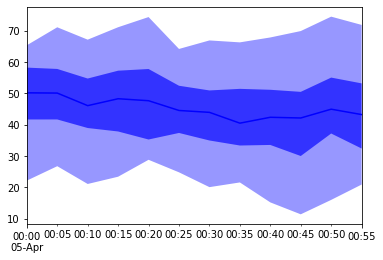

In [1]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.trainer import Trainer

import pandas as pd

url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
data = common.ListDataset([{"start": df.index[0],
                            "target": df.value[:"2015-04-05 00:00:00"]}],
                          freq="5min")

trainer = Trainer(epochs=10)
estimator = deepar.DeepAREstimator(freq="5min", prediction_length=12, trainer=trainer)
predictor = estimator.train(training_data=data)

prediction = next(predictor.predict(data))
print(prediction.mean)
prediction.plot(output_file='graph.png')

- 똑같은 코드를 CPU버전으로 돌려봤을 때와의 시간차이가 크지 않음
 - https://colab.research.google.com/github/iskra3138/GluonTS/blob/master/1.2.%20GluonTS_Intro_cpu.ipynb
- MXNET의 문제인지, 시계열 분석의 특징인지, DeepAR의 특징인지는 향후 검증 필요함!!! 